In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [459]:
df = pd.read_excel('AirQualityUCI.xlsx',sheet_name='AirQualityUCI')

In [460]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  Unnamed: 15  Unnamed: 16  
0  13.60  48.875001  0.757754          NaN          NaN  
1  13.30  47.700000  0.725487          NaN          NaN  
2  11.90  53.975000  0.750239          NaN          NaN  
3  11.00  60.000000  0.786713          NaN          NaN  
4  11.15  59.575001  0.788794          NaN          NaN

In [461]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  Unnamed: 15  Unnamed: 16  
count  9357.000000  9357.000000  9357.000000          0.0          0.0  
mean      9.776600    39.483611    -6.837604          NaN          NaN  
std      43.203438    51.215645    38.976670          NaN          NaN  
min    -200.000000  -200.000000  -200.000000          NaN          NaN  
25%      10.950000    34.050000     0.692275          NaN          NaN  
50%      17.200000    48.550000     0.976823          NaN          NaN  
75%      24.075000    61.875000     1.296223          NaN          NaN  
max      44.600000    88.725000     2.231036          NaN          NaN

In [462]:
df.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [463]:
# removing the last two empty columns

df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [464]:
# Check after removal of two unwanted columns

df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [465]:
# Check the count of -200 value in each column. This value is considered as missing value as mentioned in the dataset info

df[df==-200].count()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [466]:
# most of the values are empty, that is, filled with -200 value and so removing this below mentioned column from dataframe, 
# as it would not provide any inferences for the model

df.drop('NMHC(GT)',axis=1,inplace=True)

#### Plot and check for outliers in the dataframe

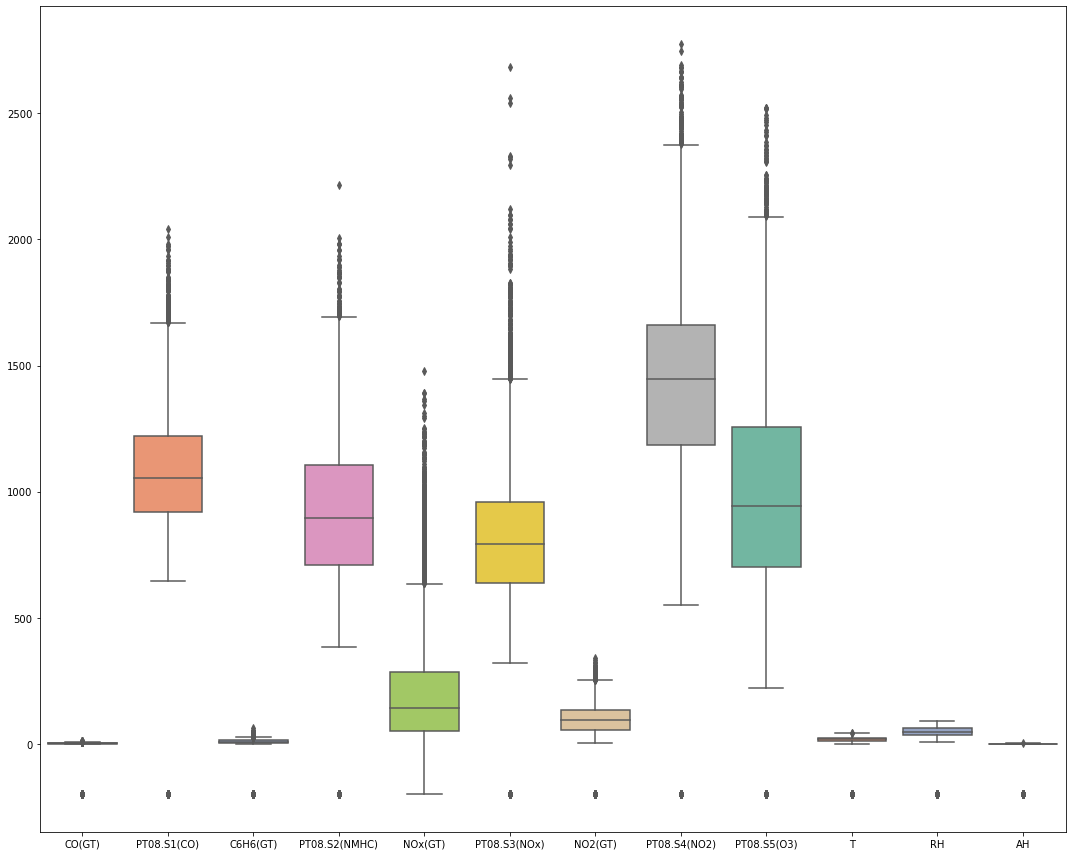

In [467]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df,width=0.8,palette="Set2")
plt.tight_layout()

In [315]:
# treating -200 invalue values with the mean() value in one column

# df['NO2(GT)'].mask(df['NO2(GT)']==-200,df['NO2(GT)'][df['NO2(GT)']!=-200].mean(),inplace=True)

In [375]:
# Replace -200 default value with resp 'mean' value for each dataframe columns with considering
# -200 default value in the mean calculation

#columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
#       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
#       'T', 'RH', 'AH']

#for column in columns:
#    print(column , ' / Mean : ' , df[column][df[column]!=-200].mean())
#    df[column].mask(df[column]==-200,df[column][df[column]!=-200].mean(),inplace=True)

#### Treat the missing values

In [468]:
# Delete rows having default -200 value, which is consideres as missing value 

columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']

for column in columns:
    #print(column, ' / count: ',df[df[column]==-200].count())
    df.drop(df[df[column]==-200].index,inplace=True)   

In [469]:
# Check missing value columns after cleanup

df[df==-200].count()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Outlier Detection Main Function

In [413]:
#Outlier Detection Function in a dataframe column

def outliers(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#### Functions to handle the outliers in dataframe column

In [414]:
def outlier_limits_count(datacolumn):
    lowerbound,upperbound = outliers(datacolumn)
    no_of_outlier = len(datacolumn[(datacolumn < lowerbound) | (datacolumn > upperbound)])
    return lowerbound,upperbound,no_of_outlier

def treat_outliers(datacolumn):
    lowerbound,upperbound,no_of_outlier = outlier_limits_count(datacolumn)
    while(no_of_outlier > 0):
        tot_row_datacolumn = len(datacolumn)
        print('No of Outliers found: {0} from total record: {1} ', no_of_outlier,tot_row_datacolumn)
        # update with median value if outlier exists
        datacolumn.mask((datacolumn < lowerbound),datacolumn.median(),inplace=True)
        datacolumn.mask((datacolumn > upperbound),datacolumn.median(),inplace=True)
        lowerbound,upperbound,no_of_outlier = outlier_limits_count(datacolumn)
    else:
        print(' No Outliers found in the column')

In [415]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

#### Treat outliers in each dataframe columns by calling the function

In [417]:
# Loop thru each column to identify the outliers in each column before treating them

columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']

for column in columns:
    #print(column)
    lowerbound,upperbound,no_of_outlier = outlier_limits_count(df[column])
    print(column,' : outliers# ', no_of_outlier)

CO(GT)  : outliers#  191
PT08.S1(CO)  : outliers#  90
C6H6(GT)  : outliers#  164
PT08.S2(NMHC)  : outliers#  46
NOx(GT)  : outliers#  356
PT08.S3(NOx)  : outliers#  182
NO2(GT)  : outliers#  90
PT08.S4(NO2)  : outliers#  58
PT08.S5(O3)  : outliers#  56
T  : outliers#  7
RH  : outliers#  0
AH  : outliers#  22


In [418]:
# Loop thru each column to treat outliers in each column with its repective median value

columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']

#columns = ['NO2(GT)']

for column in columns:
    print(column)
    treat_outliers(df[column])

CO(GT)
No of Outliers found: {0} from total record: {1}  191 6941
No of Outliers found: {0} from total record: {1}  63 6941
No of Outliers found: {0} from total record: {1}  30 6941
 No Outliers found in the column
PT08.S1(CO)
No of Outliers found: {0} from total record: {1}  90 6941
No of Outliers found: {0} from total record: {1}  12 6941
No of Outliers found: {0} from total record: {1}  5 6941
 No Outliers found in the column
C6H6(GT)
No of Outliers found: {0} from total record: {1}  164 6941
No of Outliers found: {0} from total record: {1}  51 6941
No of Outliers found: {0} from total record: {1}  27 6941
No of Outliers found: {0} from total record: {1}  10 6941
No of Outliers found: {0} from total record: {1}  7 6941
No of Outliers found: {0} from total record: {1}  2 6941
 No Outliers found in the column
PT08.S2(NMHC)
No of Outliers found: {0} from total record: {1}  46 6941
No of Outliers found: {0} from total record: {1}  11 6941
No of Outliers found: {0} from total record: {1}

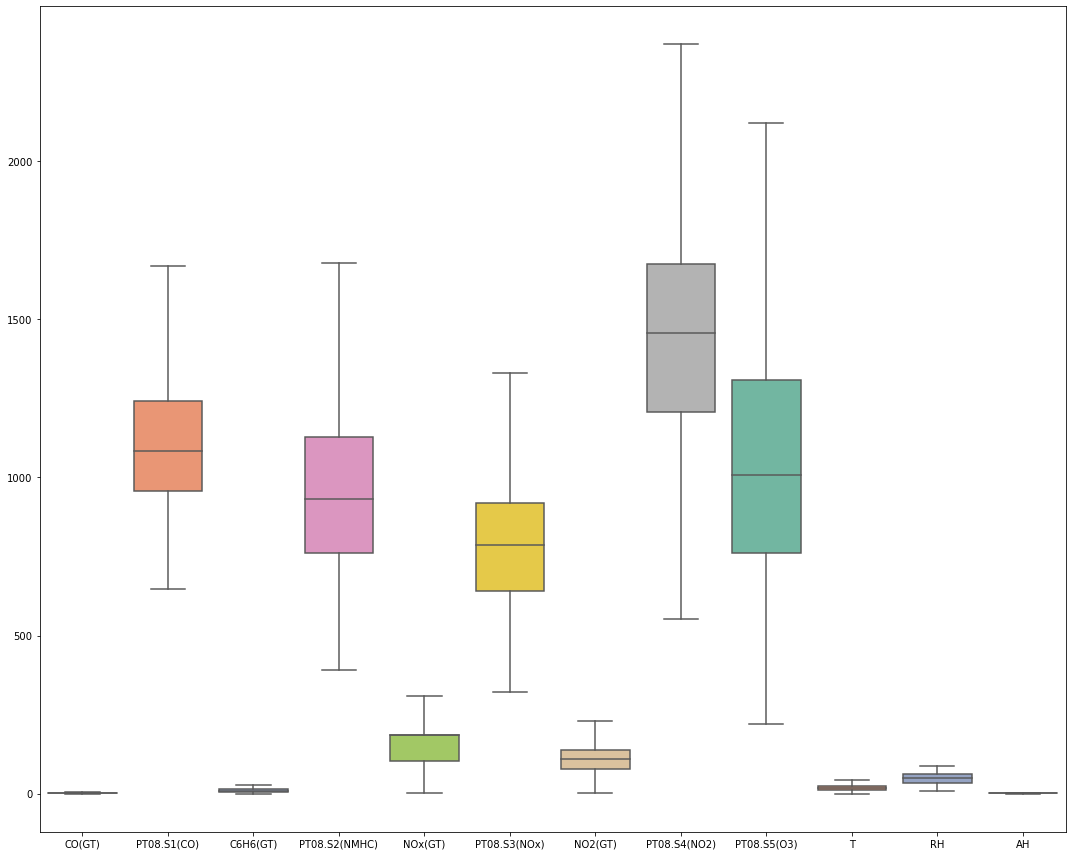

In [429]:
# Box plot and again verify each column to check for outliers after treatment

plt.figure(figsize=(15,12))
sns.boxplot(data=df,width=0.8,palette="Set2")
plt.tight_layout()

#### Explore the dataset

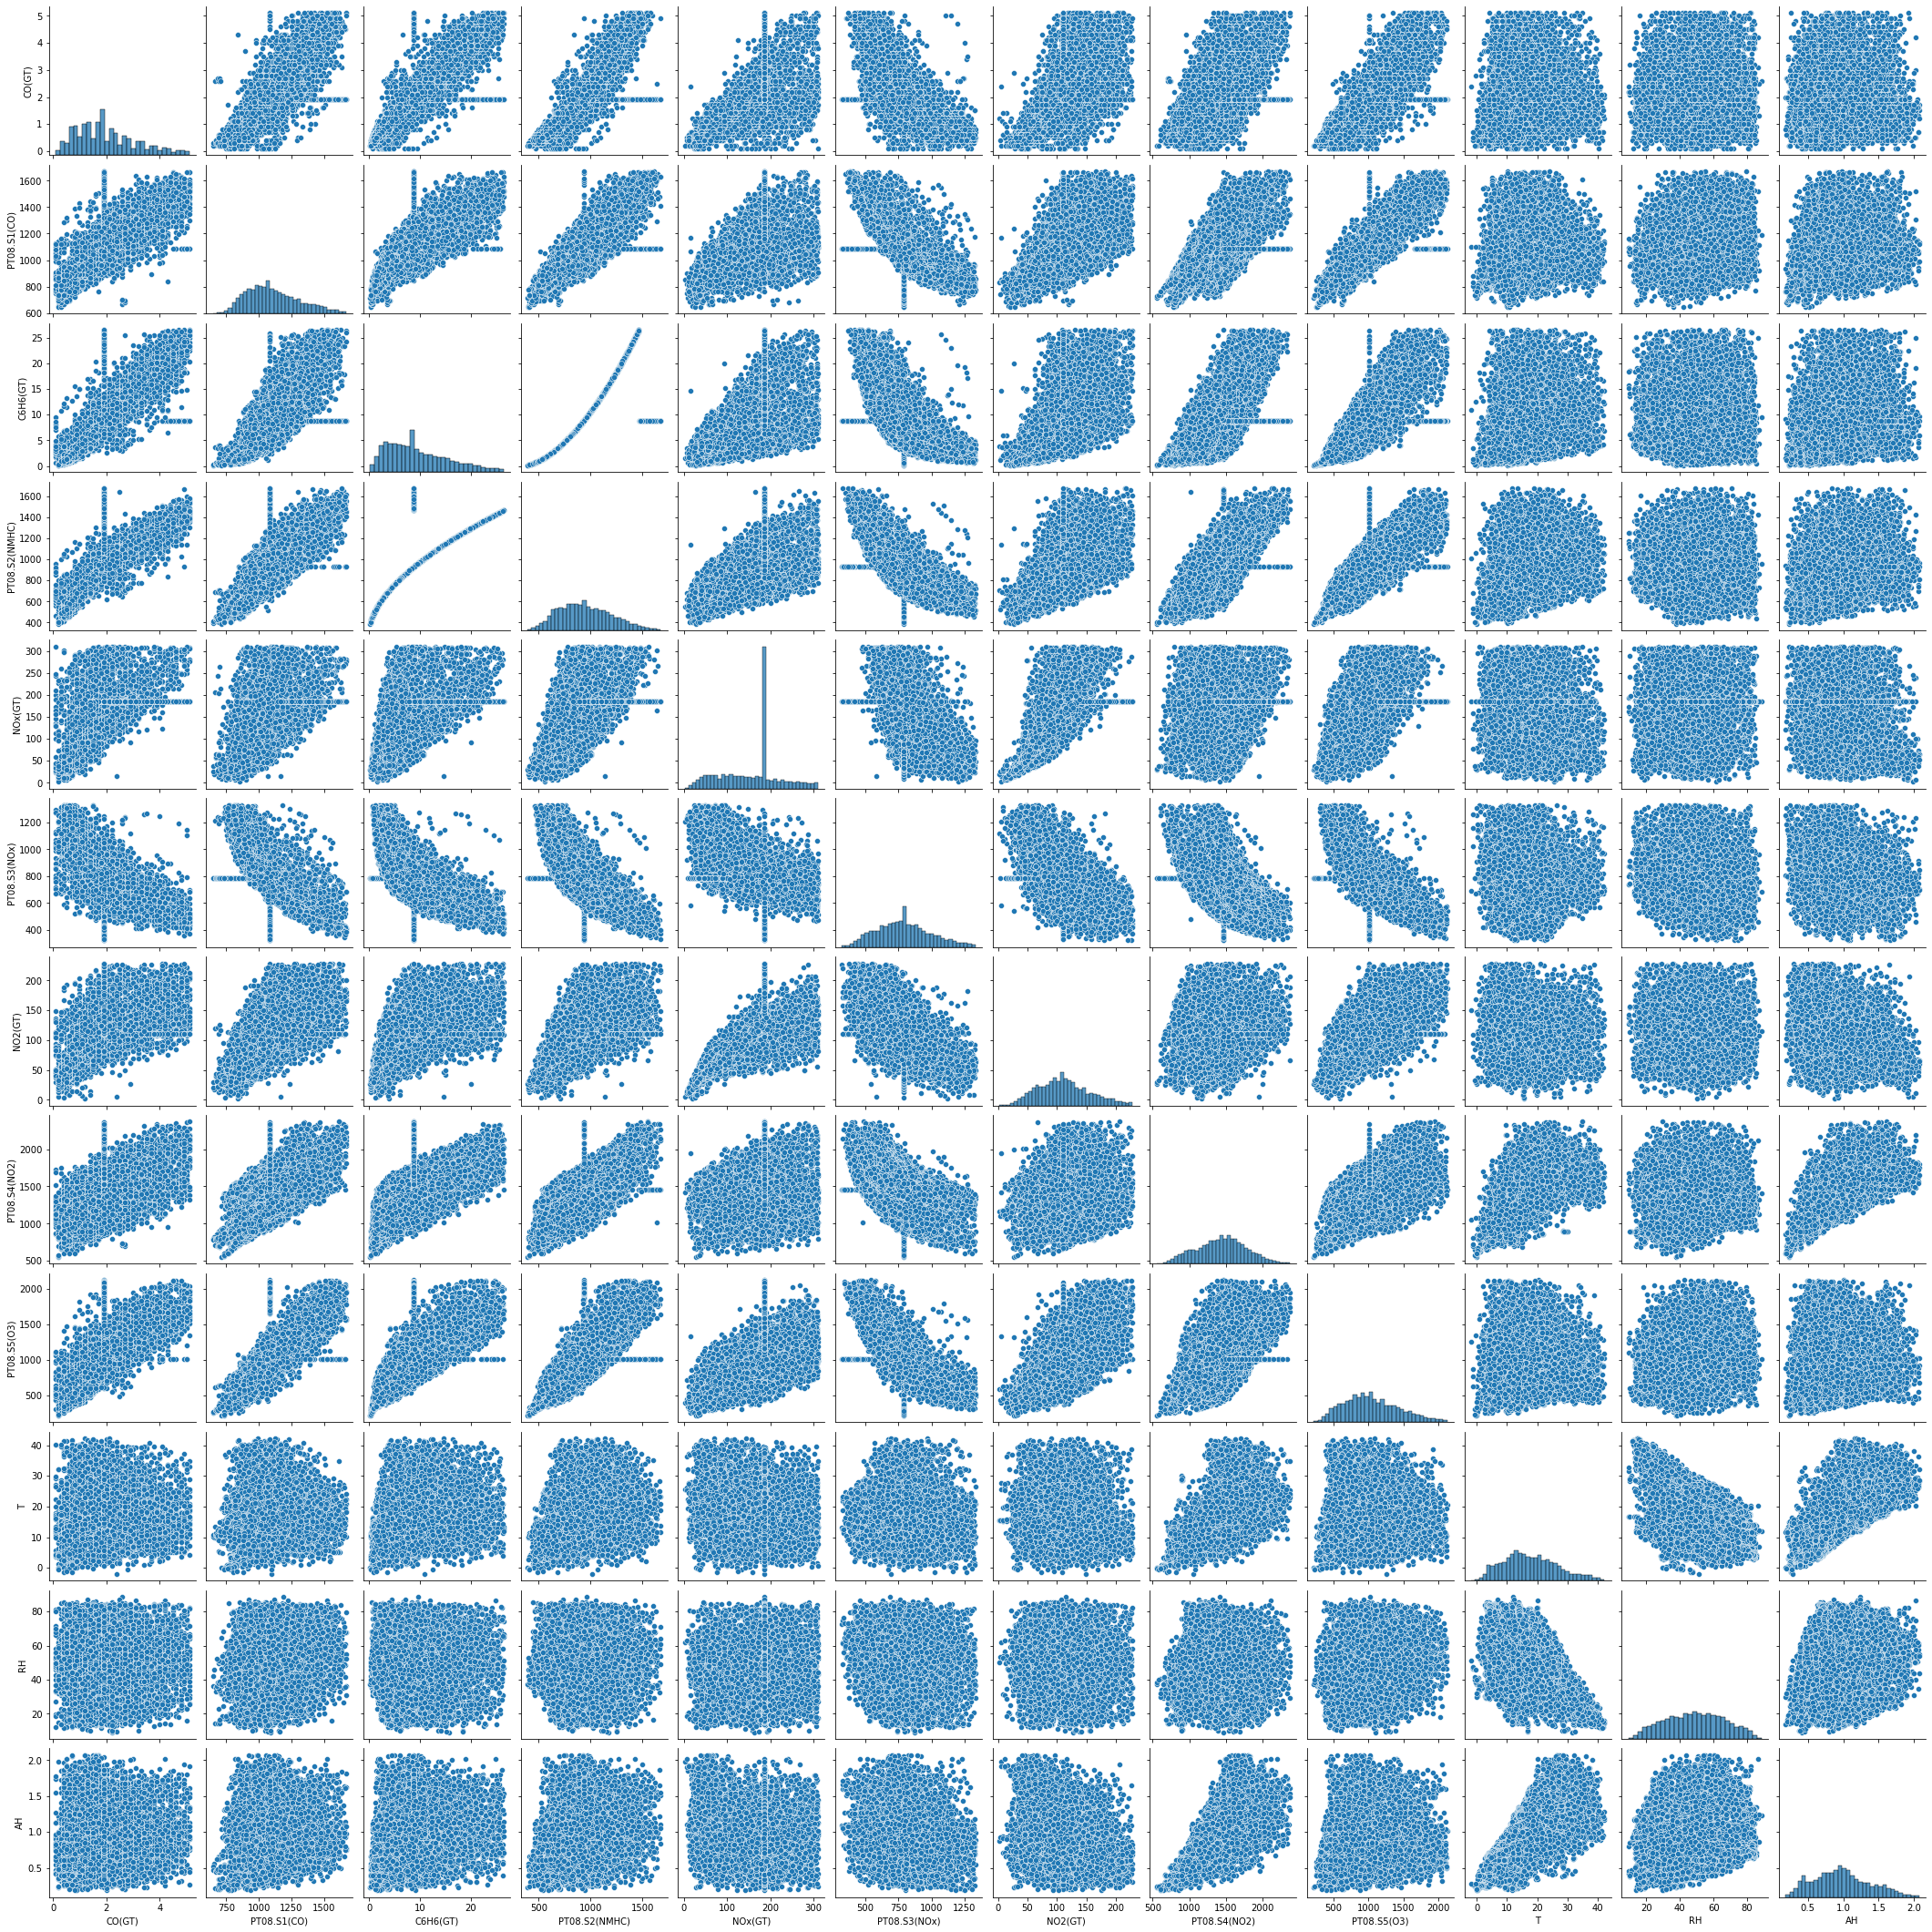

In [420]:
# Pair plot to check for bivariate data distribution

sns.pairplot(df)

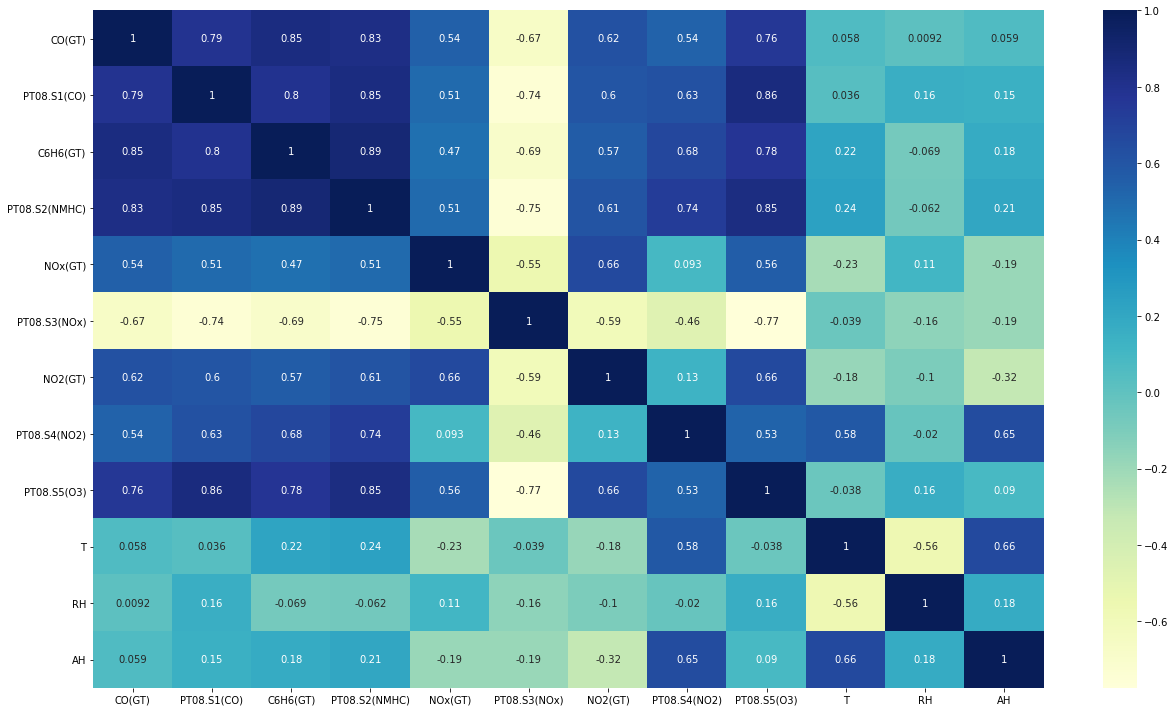

In [433]:
plt.figure(figsize=(18, 10))
sns.heatmap(df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']].corr(),cmap="YlGnBu",annot=True)
plt.tight_layout()

In [449]:
X = df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH']]

y = df['AH']

#### Standardize or Normalize the variables 

In [450]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = std.fit_transform(X)

In [453]:
df_std = pd.DataFrame(X_std)

In [458]:
df_std.describe()

0             1             2             3             4   \
count  6.941000e+03  6.941000e+03  6.941000e+03  6.941000e+03  6.941000e+03   
mean   4.612400e-16  3.975633e-16  1.259218e-16  1.191478e-16  9.523733e-15   
std    1.000072e+00  1.000072e+00  1.000072e+00  1.000072e+00  1.000072e+00   
min   -1.677917e+00 -2.282129e+00 -1.582619e+00 -2.223255e+00 -2.264088e+00   
25%   -7.949300e-01 -7.552786e-01 -7.910128e-01 -7.583241e-01 -7.863269e-01   
50%   -8.854041e-02 -1.203261e-01 -1.469224e-01 -7.938131e-02  4.280711e-01   
75%    6.178492e-01  6.554524e-01  6.477811e-01  6.966949e-01  4.280711e-01   
max    2.737018e+00  2.767843e+00  2.804937e+00  2.878232e+00  2.248205e+00   

                 5             6             7             8             9   \
count  6.941000e+03  6.941000e+03  6.941000e+03  6.941000e+03  6.941000e+03   
mean  -2.047379e-17  8.265651e-16 -1.073914e-16  5.008400e-16  2.000353e-16   
std    1.000072e+00  1.000072e+00  1.000072e+00  1.000072e+00  1.000072e+00   
min   -2.299276e+00 -2.506172e+00 -2.639376e+00 -2.125882e+00 -2.229318e+00   
25%   -7.246911e-01 -7.418859e-01 -6.988687e-01 -7.366261e-01 -7.410470e-01   
50%   -2.036869e-02 -3.158903e-02  4.269794e-02 -1.000450e-01 -9.915929e-02   
75%    6.298696e-01  6.328822e-01  6.858331e-01  6.752038e-01  6.762184e-01   
max    2.660481e+00  2.688160e+00  2.747714e+00  2.779082e+00  2.780815e+00   

                 10  
count  6.941000e+03  
mean   1.881669e-16  
std    1.000072e+00  
min   -2.277793e+00  
25%   -7.776268e-01  
50%    1.691658e-02  
75%    7.655657e-01  
max    2.285811e+00